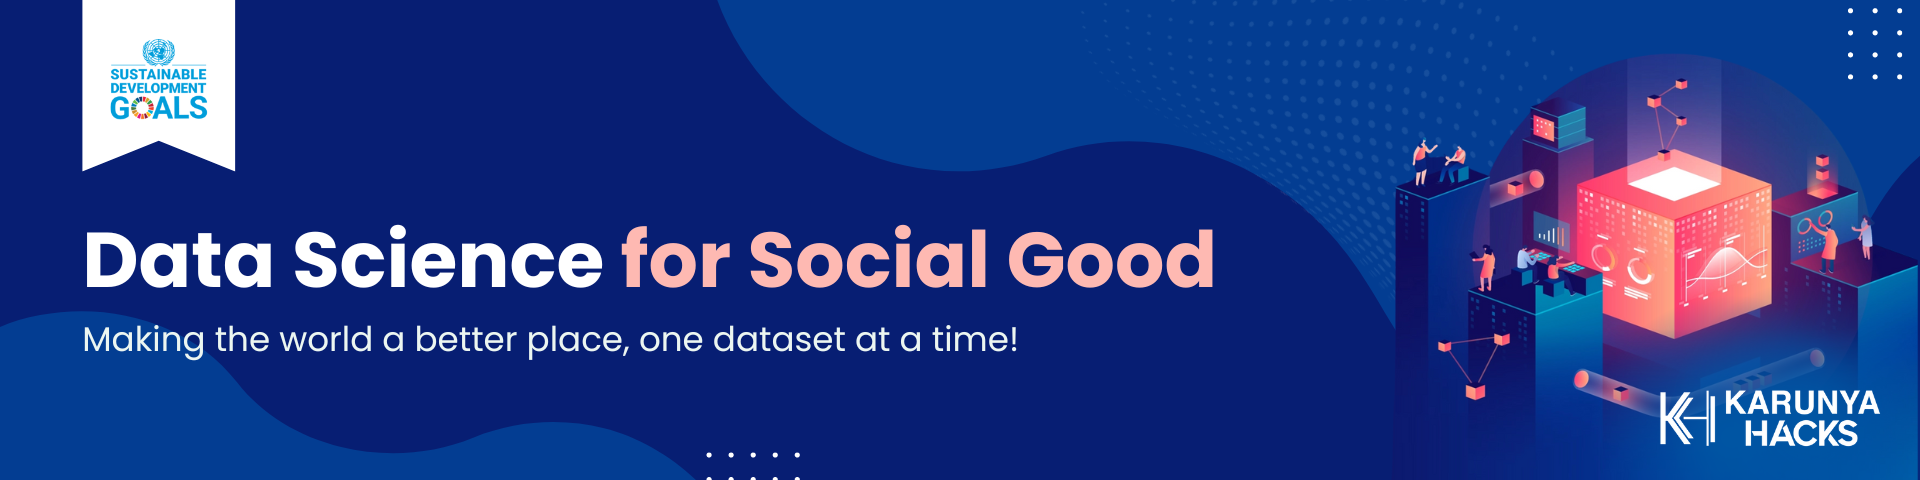

# KNN - Classification

In [3]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
path = "drive/My Drive/Colab Notebooks/Cancer.csv"
df = pd.read_csv(path)
df

Mounted at /content/drive


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,M
...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,M
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,M
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,M
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,M


In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
df.dropna(inplace = True)

a) Use the columns: 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean',
'symmetry_mean', 'fractal_dimension_mean' as the independent variables

In [5]:
x=df.iloc[:, 1:-1].values
print(x[0:10])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414e-01
  1.052e-01 2.597e-01 9.744e-02]
 [2.029e+01 1.434e+01 1.351e+02 1.297e+03 1.003e-01 1.328e-01 1.980e-01
  1.043e-01 1.809e-01 5.883e-02]
 [1.245e+01 1.570e+01 8.257e+01 4.771e+02 1.278e-01 1.700e-01 1.578e-01
  8.089e-02 2.087e-01 7.613e-02]
 [1.825e+01 1.998e+01 1.196e+02 1.040e+03 9.463e-02 1.090e-01 1.127e-01
  7.400e-02 1.794e-01 5.742e-02]
 [1.371e+01 2.083e+01 9.020e+01 5.779e+02 1.189e-01 1.645e-01 9.366e-02
  5.985e-02 2.196e-01 7.451e-02]
 [1.300e+01 2.182e+01 8.750e+01 5.198e+02 1.273e-01 1.932e-01 1.859e-01
  9.353e-02 2.350e-01 7.389e-02]
 [1.246e+01 2.404e+01 8.397e+01 4.759e+02 1.186e-01 2.3

c. Encode the categorical value of the target column to numerical value

In [ ]:
df['diagnosis']= df['diagnosis'].replace({'M':1, 'B':0})
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

b. Use the target variable as 'diagnosis' (Malignant – M, Benign – B)

In [ ]:
y = df.iloc[:, -1].values
print(y[0:10])

[1 1 1 1 1 1 1 1 1 1]


d. Divide the data into training (75%) and testing set (25%)

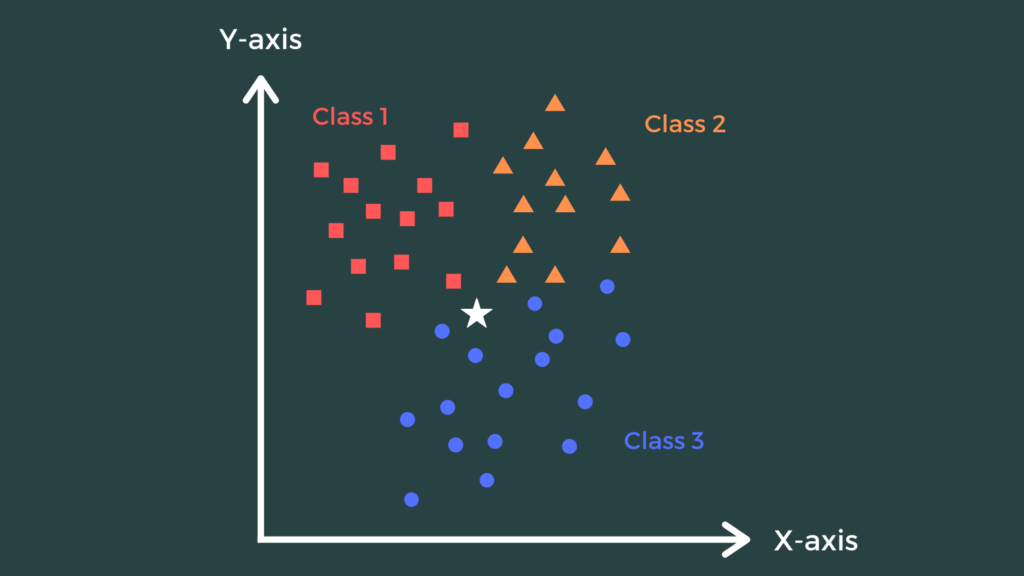

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)

In [ ]:
print(x_train)

[[ 0.30575375  2.59521918  0.46246107 ...  1.16366689  1.18198433
   1.28429612]
 [ 0.23351721 -0.05334893  0.20573083 ... -0.01640861  0.26394984
  -0.63317355]
 [ 0.15572401  0.18345881  0.11343692 ...  0.09622333 -0.8163076
  -0.52992519]
 ...
 [ 0.85586279  1.19276558  0.89773369 ...  0.78353411  0.44092035
   0.30343663]
 [-0.02486734  0.44095848 -0.08606303 ... -0.76464303 -1.0707027
  -0.65824816]
 [-0.30270019 -0.20968802 -0.37543871 ... -0.50174985 -1.25504698
  -0.61694881]]


In [ ]:
standard_Scalar = StandardScaler()
x_train = standard_Scalar.fit_transform(x_train)
x_test = standard_Scalar.transform(x_test)

e. Perform the classification with K=3

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(x_test)
print(y_pred)
print(y_test)

[0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1
 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1
 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0]
[0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1
 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0]


# K-Means Clustering

In [33]:
#import the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Vidualization

In [43]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
path = 'drive/My Drive/Colab Notebooks/Mall_Customers.csv'
dataset = pd.read_csv(path)
dataset

Mounted at /content/drive


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [44]:
X= dataset.iloc[:, [3,4]].values

In [ ]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

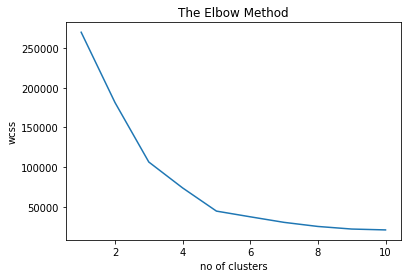

In [ ]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
#Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)


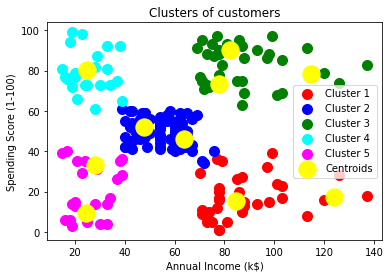

In [ ]:
#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
###Model Interpretation 
#Cluster 1 (Red Color) -> earning high but spending less
#cluster 2 (Blue Colr) -> average in terms of earning and spending 
#cluster 3 (Green Color) -> earning high and also spending high [TARGET SET]
#cluster 4 (cyan Color) -> earning less but spending more
#Cluster 5 (magenta Color) -> Earning less , spending less

# Assesment - 2
#Group -1 

In [8]:
df = pd.read_csv('Social_Network.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15668575,0,26,43000,No
1,15603246,0,27,57000,No
2,15598044,0,27,84000,No
3,15727311,0,35,65000,No
4,15570769,0,26,80000,No


In [50]:
x=df.iloc[:,1:-1].values
print(x)
df['Purchased']= df['Purchased'].replace({'No':0,'Yes':1})
y = df.iloc[:,-1].values

[[    0    26 43000]
 [    0    27 57000]
 [    0    27 84000]
 ...
 [    1    47 23000]
 [    1    60 42000]
 [    1    51 23000]]


In [51]:
# y = y.replace({'No':0,'Yes':1})
# df['diagnosis']= df['diagnosis'].replace({'M':1, 'B':0})
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [52]:
import sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [53]:
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [54]:
y_pred = knn1.predict(x_test)
print(y_pred)
print(y_test)

[0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0
 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0]
[0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1
 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0]


In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_curve, auc

In [56]:
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [57]:
print(conf_matrix)

[[52  9]
 [18 21]]


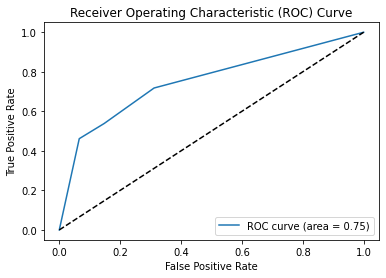

In [58]:
y_pred_proba = knn1.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Values for  5  neighbours
Confusion Matrix:
 [[52  9]
 [18 21]]
Accuracy:  0.73
Recall:  0.5384615384615384
Precision:  0.7
F1-score:  0.608695652173913
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.85      0.79        61
           1       0.70      0.54      0.61        39

    accuracy                           0.73       100
   macro avg       0.72      0.70      0.70       100
weighted avg       0.73      0.73      0.72       100

AUC score:  0.7833123160992014


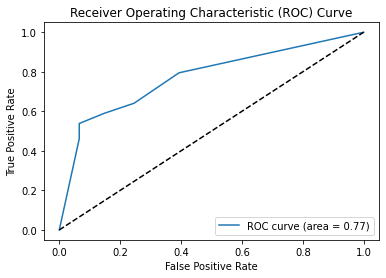

Values for  7  neighbours
Confusion Matrix:
 [[52  9]
 [18 21]]
Accuracy:  0.73
Recall:  0.5384615384615384
Precision:  0.7
F1-score:  0.608695652173913
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.85      0.79        61
           1       0.70      0.54      0.61        39

    accuracy                           0.73       100
   macro avg       0.72      0.70      0.70       100
weighted avg       0.73      0.73      0.72       100

AUC score:  0.7721731820092476


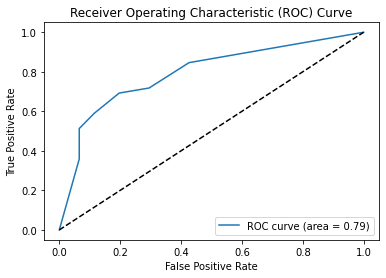

Values for  9  neighbours
Confusion Matrix:
 [[52  9]
 [18 21]]
Accuracy:  0.73
Recall:  0.5384615384615384
Precision:  0.7
F1-score:  0.608695652173913
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.85      0.79        61
           1       0.70      0.54      0.61        39

    accuracy                           0.73       100
   macro avg       0.72      0.70      0.70       100
weighted avg       0.73      0.73      0.72       100

AUC score:  0.7929802437999158


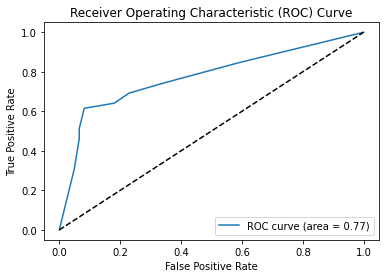

Values for  11  neighbours
Confusion Matrix:
 [[52  9]
 [18 21]]
Accuracy:  0.73
Recall:  0.5384615384615384
Precision:  0.7
F1-score:  0.608695652173913
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.85      0.79        61
           1       0.70      0.54      0.61        39

    accuracy                           0.73       100
   macro avg       0.72      0.70      0.70       100
weighted avg       0.73      0.73      0.72       100

AUC score:  0.7738545607398066


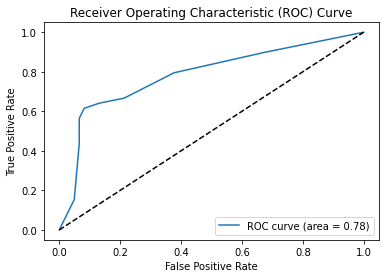

In [65]:
list1 = [5,7,9,11]
for i in list1:
  knn2 = KNeighborsClassifier(n_neighbors=i)
  knn2.fit(x_train,y_train)
  y_pred = knn1.predict(x_test)
  conf_matrix = confusion_matrix(y_test, y_pred)
  tn, fp, fn, tp = conf_matrix.ravel()
  accuracy = accuracy_score(y_test, y_pred)
  recall = tp / (tp + fn)
  precision = tp / (tp + fp)
  f1_score = 2 * precision * recall / (precision + recall)
  report = classification_report(y_test, y_pred)
  print("Values for ",i," neighbours")
  print("Confusion Matrix:\n", conf_matrix)
  print("Accuracy: ", accuracy)
  print("Recall: ", recall)
  print("Precision: ", precision)
  print("F1-score: ", f1_score)
  print("Classification Report:\n", report)
  print("AUC score: ", auc_score)
  # print("True positive: ",tp)
  # print("True negative: ", tn)
  y_pred_proba = knn2.predict_proba(x_test)
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
  auc_score = auc(fpr, tpr)
  plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc="lower right")
  plt.show()


#The model with 9 neighbours is the best